### Student Performance Indicator
#### Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model
1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.
match

- 2.1 Import Data and Required Packages
- Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Reading the dataset 

In [3]:
df=pd.read_csv('data/stud.csv')

##### Reading top 5 rows 

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### Checking shape of the Student dataset 

In [5]:
df.shape

(1000, 8)

### 2.2 Dataset information
- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's- degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score
3. Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

##### 3.1) Checking Missing values

In [6]:
# checking Missing values 
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values 

##### 3.2) Checking Duplicates 

In [7]:
df.duplicated().sum()

0

There are no duplicates 


##### 3.3) Checking Datatypes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### 3.4) Checking unique values for each column

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

##### 3.5) Checking Statistical  data for numerical column

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### 3.6)Exploring the Categorical variables 

In [11]:
cols=df.columns
categorical_variables=[i for i in cols if df[i].dtype =='O']
for i in categorical_variables:
    print(f"There are {df[i].nunique()} categories in [{i}] : {df[i].unique()}  ")
     

There are 2 categories in [gender] : ['female' 'male']  
There are 5 categories in [race_ethnicity] : ['group B' 'group C' 'group A' 'group D' 'group E']  
There are 6 categories in [parental_level_of_education] : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']  
There are 2 categories in [lunch] : ['standard' 'free/reduced']  
There are 2 categories in [test_preparation_course] : ['none' 'completed']  


##### 3.7)Creating a numerical variable group


In [12]:
numerical_variables=[i for i in cols if df[i].dtype !='O']
print(f"There are \n{len(categorical_variables)} categorical_variables: {categorical_variables} \nand \n{len(numerical_variables)} numerical_variables: {numerical_variables}\nin the dataset ")

There are 
5 categorical_variables: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'] 
and 
3 numerical_variables: ['math_score', 'reading_score', 'writing_score']
in the dataset 


##### Creating  Total and Average Variables

In [13]:
df['Total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['Average']=df['Total_score']/len(numerical_variables)
df.head(2)


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


###### Checking 100 percent score and below 20%

In [14]:
print(f"Count of students with 100 % marks in reading  are :{df[df['reading_score']==100]['Average'].count()}")
print(f"Count of students with 100 % marks in math     are :{df[df['math_score']==100]['Average'].count()}")
print(f"Count of students with 100 % marks in writing  are :{df[df['writing_score']==100]['Average'].count()}")	
print(f"Count of students with below 20 % marks in reading  are :{df[df['reading_score']<20]['Average'].count()}")
print(f"Count of students with below 20 % marks in math     are :{df[df['math_score']<20]['Average'].count()}")
print(f"Count of students with below 20 % marks in writing  are :{df[df['writing_score']<20]['Average'].count()}")	

Count of students with 100 % marks in reading  are :17
Count of students with 100 % marks in math     are :7
Count of students with 100 % marks in writing  are :14
Count of students with below 20 % marks in reading  are :1
Count of students with below 20 % marks in math     are :4
Count of students with below 20 % marks in writing  are :3


#### Plotting the Histograms

<Axes: xlabel='Average', ylabel='Count'>

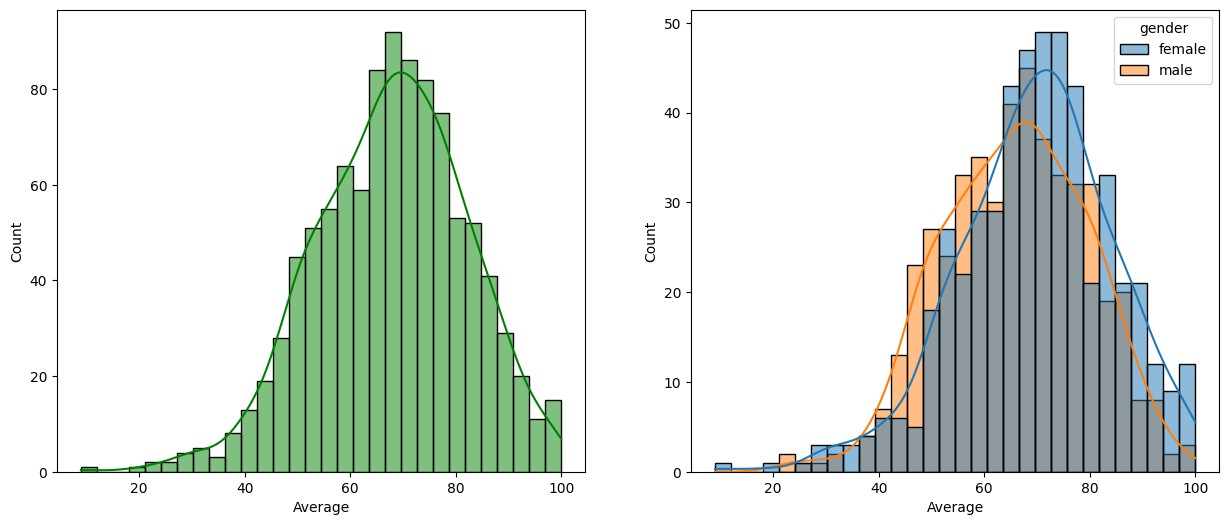

In [15]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g')
plt.subplot(1,2,2)
sns.histplot(data=df,x='Average',bins=30,kde=True,hue='gender')


<Axes: xlabel='Total_score', ylabel='Count'>

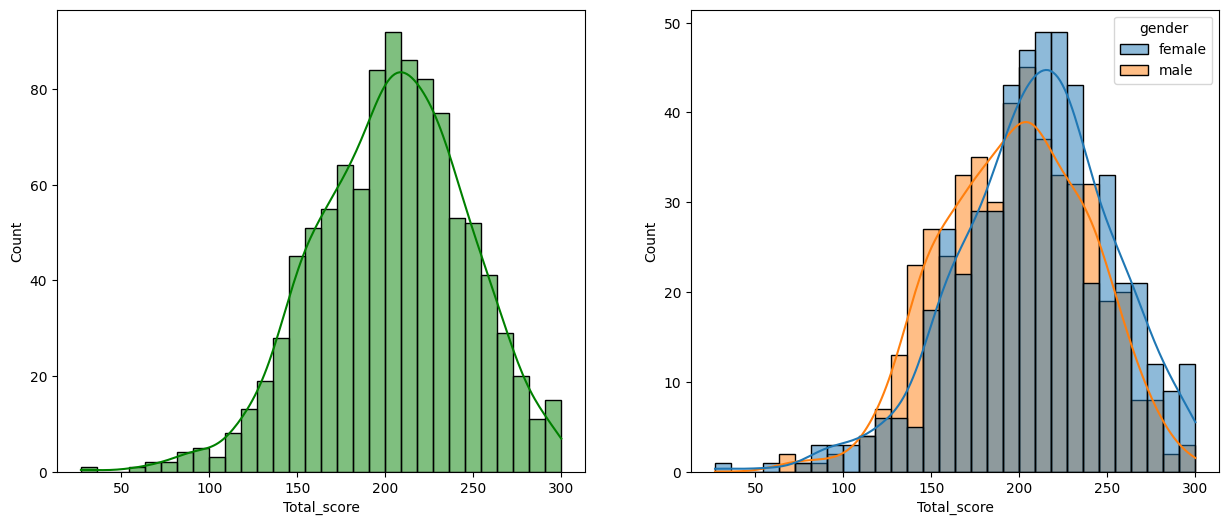

In [16]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(data=df,x='Total_score',bins=30,kde=True,color='g')
plt.subplot(1,2,2)
sns.histplot(data=df,x='Total_score',bins=30,kde=True,hue='gender')

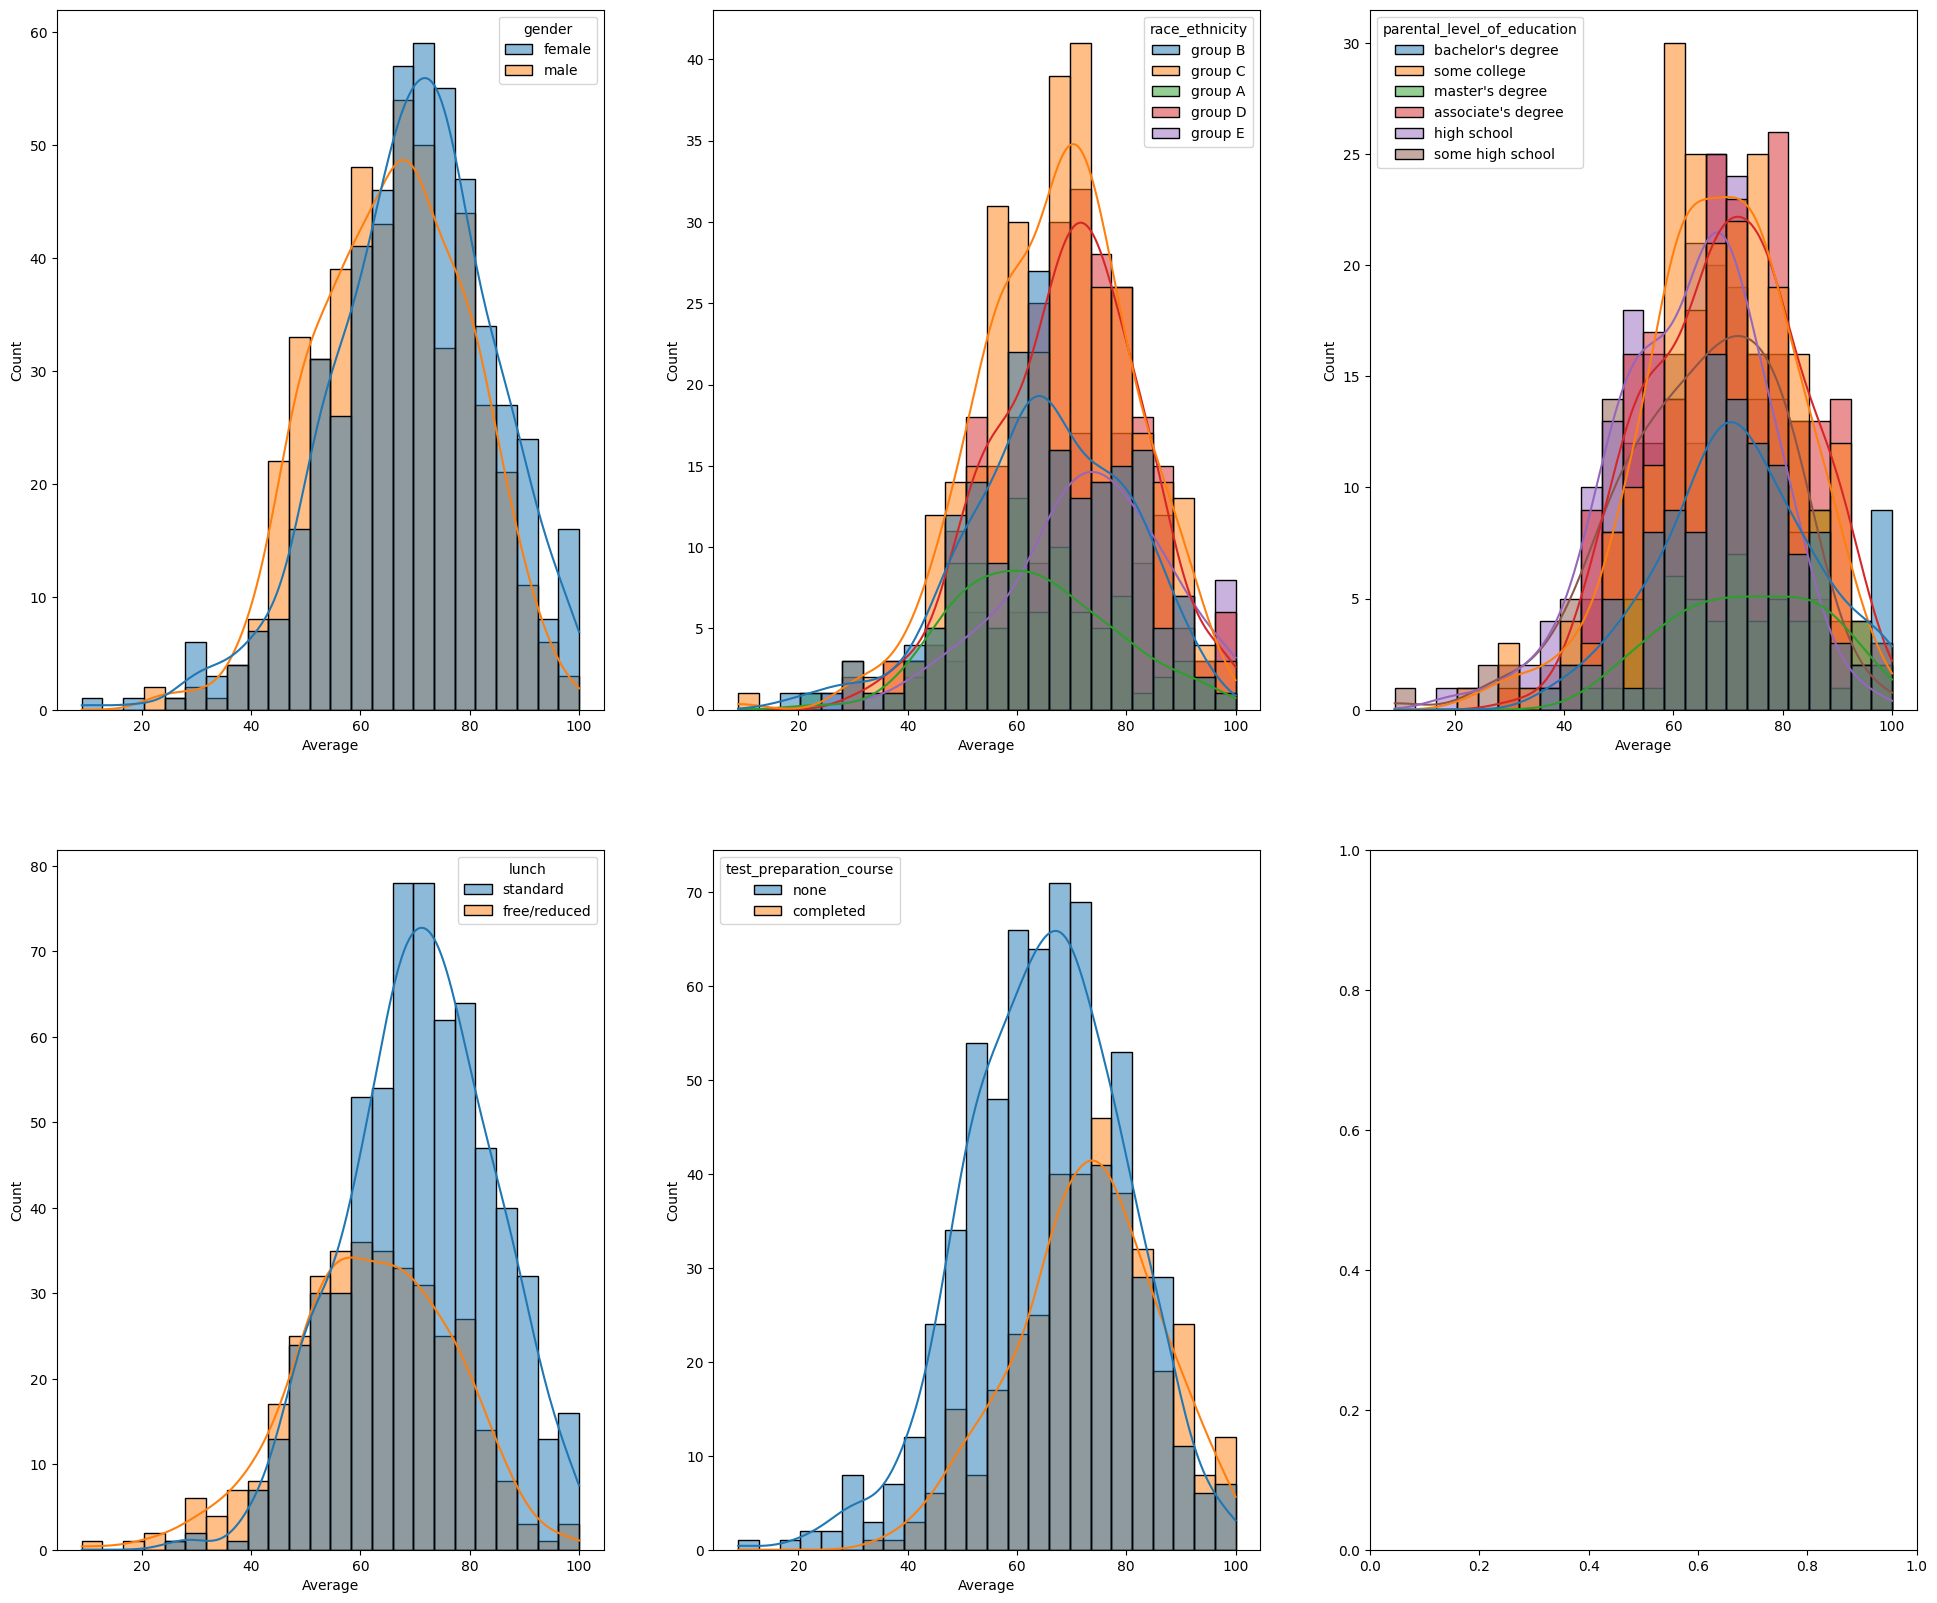

In [17]:
plt.subplots(2,3,figsize=(24,20))
feature=df.columns

for i in enumerate(categorical_variables):
    plt.subplot(2,3,i[0]+1)
    sns.histplot(data=df,x='Average',hue=i[1],kde=True)
    
# plt.subplots(2,3,figsize=(24,20))
# plt.subplot(2,3,1)
# sns.histplot(data=df,x='Total_score',hue='parental_level_of_education',kde=True)
# plt.subplot(2,3,2)
# sns.histplot(data=df[df['gender']=='male'],x='Total_score',hue='parental_level_of_education',kde=True)
# plt.subplot(2,3,3)
# sns.histplot(data=df[df['gender']=='female'],x='Total_score',hue='parental_level_of_education',kde=True)
# plt.subplot(2,3,4)
# sns.histplot(data=df,x='Average',hue='parental_level_of_education',kde=True)
# plt.subplot(2,3,5)
# sns.histplot(data=df[df['gender']=='male'],x='Average',hue='parental_level_of_education',kde=True)
# plt.subplot(2,3,6)
# sns.histplot(data=df[df['gender']=='female'],x='Average',hue='parental_level_of_education',kde=True)

#### Insights 
- Females are performing better 
- 

In [21]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [40]:
dfdf.groupby(['race_ethnicity']).sum().sort_values(by=['Average'],ascending=False)

NameError: name 'dfdf' is not defined